In [133]:
import numpy as np

In [134]:
def loadDataSet(filename):
    dataMat = []
    fr = open(filename)
    for line in fr.readlines():
        temp = []
        curLine = line.strip().split('\t')
        temp.append(curLine[0])
        temp.append(curLine[1])
        dataMat.append(temp)
    return dataMat

In [135]:
dataSet = loadDataSet("C:\\Users\\miaoh\\Desktop\\Python_Project\\Kmeans\\dataSet.txt")

In [136]:
dataMat = np.matrix(dataSet)

In [137]:
dataMat[:,0]

matrix([['1.658985'],
        ['-3.453687'],
        ['4.838138'],
        ['-5.379713'],
        ['0.972564'],
        ['-3.567919'],
        ['0.450614'],
        ['-3.487105'],
        ['2.668759'],
        ['-3.156485'],
        ['3.165506'],
        ['-2.786837'],
        ['4.208187'],
        ['-2.123337'],
        ['0.704199'],
        ['-0.392370'],
        ['2.831667'],
        ['-0.790153'],
        ['2.943496'],
        ['-3.195883'],
        ['2.336445'],
        ['-1.786345'],
        ['2.190101'],
        ['-3.403367'],
        ['1.778124'],
        ['-1.688346'],
        ['2.592976'],
        ['-4.007257'],
        ['2.257734'],
        ['-2.679011'],
        ['0.939512'],
        ['-3.674424'],
        ['2.046259'],
        ['-3.189470'],
        ['4.372646'],
        ['-2.579316'],
        ['1.889034'],
        ['-0.798747'],
        ['2.836520'],
        ['-3.837877'],
        ['2.096701'],
        ['-2.709034'],
        ['3.367037'],
        ['-2.121479'],
        ['

In [138]:
def distEclud(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA.astype('float64') - vecB.astype('float64'), 2)))

In [195]:
# def randCent(dataSet,k):
#     n = dataSet.shape[1]
#     centroids = np.matrix(np.zeros((k,n)))
#     print(centroids)
#     for j in range(n):
#         minJ= min(dataSet[:,j])
#         maxJ= max(dataSet[:,j])
#         rangeJ=float(np.subtract(float(maxJ),float(minJ)))
#         centroids[:,j]=np.matrix(float(minJ) + rangeJ * np.random.rand(k,1))
#     return centroids
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.matrix(np.zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j])
        rangeJ = float(float(max(dataSet[:,j])) - float(minJ))
        centroids[:,j] = np.matrix(float(minJ) + rangeJ * np.random.rand(k,1))
    return centroids

In [196]:
randCent(dataMat,4)

matrix([[ 2.22821329,  4.69718767],
        [ 1.84913379,  4.22436258],
        [ 1.11613081, -0.47229121],
        [ 2.36261667,  2.83792953]])

In [209]:
def kMeans(dataSet,k,distMeas=distEclud,createCent=randCent):
    #获取数据集样本数
    m=dataSet.shape[0]
    #初始化一个(m,2)的矩阵
    clusterAssment=np.matrix(np.zeros((m,2)))
    #创建初始的k个质心向量
    centroids=createCent(dataSet,k)
    #聚类结果是否发生变化的布尔类型
    clusterChanged=True
    #只要聚类结果一直发生变化，就一直执行聚类算法，直至所有数据点聚类结果不变化
    while clusterChanged:
        #聚类结果变化布尔类型置为false
        clusterChanged=False
        #遍历数据集每一个样本向量
        for i in range(m):
            #初始化最小距离最正无穷；最小距离对应索引为-1
            minDist=float("inf") 
            minIndex=-1
            #循环k个类的质心
            for j in range(k):
                #计算数据点到质心的欧氏距离
                distJI=distMeas(centroids[j,:],dataSet[i,:])
                #如果距离小于当前最小距离
                if distJI<minDist:
                    #当前距离定为当前最小距离；最小距离对应索引对应为j(第j个类)
                    minDist=distJI;minIndex=j
            #当前聚类结果中第i个样本的聚类结果发生变化：布尔类型置为true，继续聚类算法
            if clusterAssment[i,0] !=minIndex:clusterChanged=True
            #更新当前变化样本的聚类结果和平方误差
            clusterAssment[i,:]=minIndex,minDist**2
        #打印k-均值聚类的质心
        print(centroids)
        #遍历每一个质心
        for cent in range(k):
            #将数据集中所有属于当前质心类的样本通过条件过滤筛选出来
            ptsInClust=dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]
            #计算这些数据的均值（axis=0：求列的均值），作为该类质心向量
            centroids[cent,:]=np.mean(ptsInClust.astype('float64'),axis=0)
    #返回k个聚类，聚类结果及误差
    return centroids,clusterAssment

In [225]:
a,b = kMeans(dataMat,4)

[[2.53765409 4.46859382]
 [1.20282628 0.00952755]
 [2.38581895 0.07972109]
 [1.85915084 4.91133833]]
[[ 2.75537238  3.34728723]
 [-2.579279   -1.27481849]
 [ 3.21450455 -1.86947365]
 [-1.510352    3.56979017]]
[[ 2.6265299   3.10868015]
 [-3.34887714 -2.76960033]
 [ 2.80293085 -2.7315146 ]
 [-2.45009747  2.89275747]]
[[ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]


In [226]:
a

matrix([[ 2.6265299 ,  3.10868015],
        [-3.38237045, -2.9473363 ],
        [ 2.80293085, -2.7315146 ],
        [-2.46154315,  2.78737555]])

In [227]:
import matplotlib.pyplot as plt

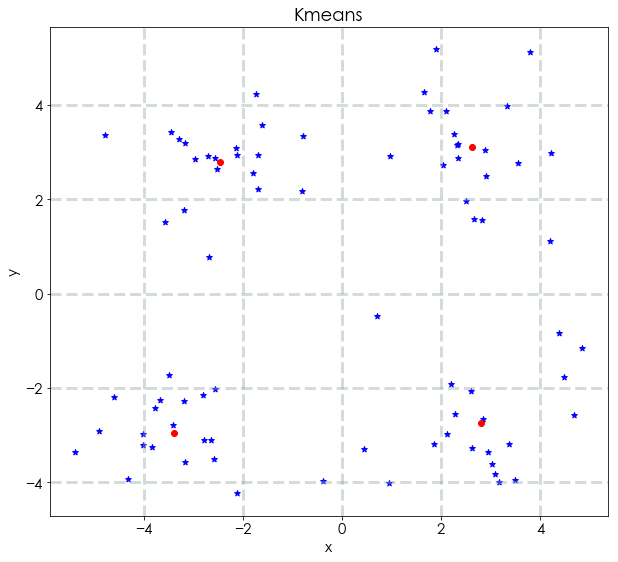

In [228]:
plt.figure(figsize=(10,9))
plt.scatter(list(dataMat[:,0]), list(dataMat[:,1]), c = "blue" , marker="*")
plt.scatter(list(a[:,0]), list(a[:,1]), c = "red",marker="o")
plt.rc('font', family='STXihei', size=15) 
plt.title("Kmeans")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(color='#95a5a6',linestyle='--',linewidth=3,axis='both',alpha= 0.4) 
fig = plt.gcf()

In [ ]:
#二分

In [293]:
def biKmeans(dataSet,k,distMeas=distEclud):
    #获取数据集样本数
    m=dataSet.shape[0]
    #初始化一个(m,2)的矩阵
    clusterAssment=np.mat(np.zeros((m,2)))
    #获取数据集每一列数据的均值，组成一个长为列数的列表
    centroid0=np.mean(dataSet.astype('float'),axis=0).tolist()[0]
    #当前聚类列表为将数据集聚为一类
    centList=[centroid0]
    #遍历每个数据集样本
    for j in range(m):
        #计算当前聚为一类时各个数据点距离质心的平方距离
        clusterAssment[j,1]=distMeas(np.mat(centroid0),dataSet[j,:])**2
    #循环，直至二分k-均值达到k类为止
    while (len(centList)<k):
        #将当前最小平方误差置为正无穷
        lowerSSE=float("inf") 
        #遍历当前每个聚类
        for i in range(len(centList)):
            #通过数组过滤筛选出属于第i类的数据集合
            ptsInCurrCluster=dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]
            #对该类利用二分k-均值算法进行划分，返回划分后结果，及误差
            centroidMat,splitClustAss=kMeans(ptsInCurrCluster,2,distMeas)
            #计算该类划分后两个类的误差平方和
            sseSplit=sum(splitClustAss[:,1])
            #计算数据集中不属于该类的数据的误差平方和
            sseNotSplit=sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            #打印这两项误差值
            print('sseSplit,and notSplit:',(sseSplit,sseNotSplit))
            #划分第i类后总误差小于当前最小总误差
            if(sseSplit+sseNotSplit)<lowerSSE:
                #第i类作为本次划分类
                bestCentToSplit=i
                #第i类划分后得到的两个质心向量
                bestNewCents=centroidMat
                #复制第i类中数据点的聚类结果即误差值
                bestClustAss=splitClustAss.copy()
                #将划分第i类后的总误差作为当前最小误差
                lowerSSE=sseSplit+sseNotSplit
        #数组过滤筛选出本次2-均值聚类划分后类编号为1数据点，将这些数据点类编号变为
        #当前类个数+1，作为新的一个聚类
        bestClustAss[np.nonzero(bestClustAss[:,0].A==1)[0],0]= len(centList)
        #同理，将划分数据集中类编号为0的数据点的类编号仍置为被划分的类编号，使类编号
        #连续不出现空缺
        bestClustAss[np.nonzero(bestClustAss[:,0].A==0)[0],0]=bestCentToSplit
        #打印本次执行2-均值聚类算法的类
        print('the bestCentToSplit is:',bestCentToSplit)
        #打印被划分的类的数据个数
        print('the len of bestClustAss is:',(len(bestClustAss)))
        #更新质心列表中的变化后的质心向量
        centList[bestCentToSplit]=bestNewCents[0,:]
        #添加新的类的质心向量
        centList.append(bestNewCents[1,:])
        #更新clusterAssment列表中参与2-均值聚类数据点变化后的分类编号，及数据该类的误差平方
        clusterAssment[np.nonzero(clusterAssment[:,0].A==bestCentToSplit)[0],:]=bestClustAss
    #返回聚类结果
    return centList,clusterAssment

In [294]:
dataSet2 = loadDataSet("C:\\Users\\miaoh\\Desktop\\Python_Project\\Kmeans\\dataSet2.txt")
dataMat2 = np.mat(dataSet2)
a,b = biKmeans(dataMat2,3)

[[ 1.03005737  0.69641569]
 [ 2.91834047 -0.60646521]]
[[-0.67235448  2.02595687]
 [ 1.53321007 -1.40530064]]
[[-0.38704247  3.38960056]
 [ 0.18625683 -2.02107554]]
[[-0.06953469  3.29844341]
 [-0.32150057 -2.62473743]]
[[-0.00675605  3.22710297]
 [-0.45965615 -2.7782156 ]]
sseSplit,and notSplit: (matrix([[453.03348958]]), 0)
the bestCentToSplit is: 0
the len of bestClustAss is: 60
[[1.82402831 3.46883962]
 [0.24533112 1.60184534]]
[[ 2.95977168  3.26903847]
 [-2.69075733  3.18916133]]
[[ 2.93386365  3.12782785]
 [-2.94737575  3.3263781 ]]
sseSplit,and notSplit: (matrix([[77.59224932]]), matrix([[29.15724944]]))
[[-0.02353842 -1.69954169]
 [ 0.12514072 -3.05007874]]
[[-1.3776246  -1.6522424 ]
 [-0.15366667 -3.15354   ]]
[[-1.41084317 -1.873139  ]
 [-0.05200457 -3.16610557]]
[[-1.31198114e+00 -1.96162114e+00]
 [-7.11923077e-04 -3.21792031e+00]]
[[-1.26873575 -2.07139688]
 [ 0.07973025 -3.24942808]]
[[-1.26405367 -2.209896  ]
 [ 0.19848727 -3.24320436]]
[[-1.1836084 -2.2507069]
 [ 0.2642

In [310]:
x = []
y = []
for i in a:
    x.append(i[0,0])
    y.append(i[0,1])

In [314]:
list(x)

[2.93386365, -0.45965614999999993, -2.94737575]

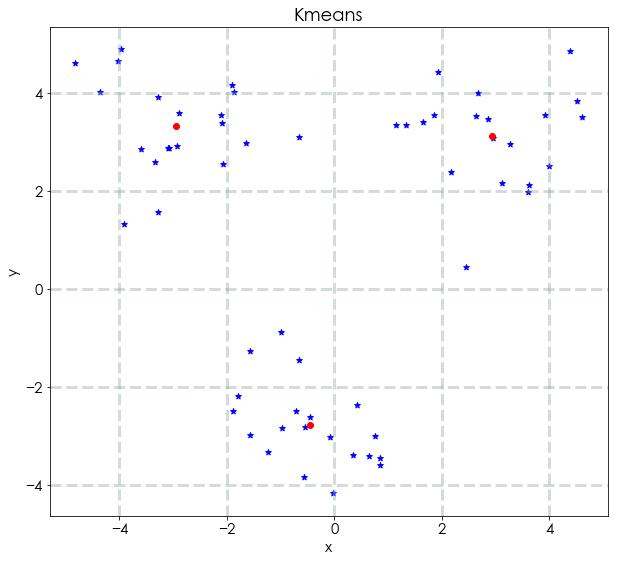

In [318]:
plt.figure(figsize=(10,9))
plt.scatter(list(dataMat2[:,0]),list(dataMat2[:,1]), c = "blue" , marker="*")
plt.scatter(x, y, c = "red",marker="o")
plt.rc('font', family='STXihei', size=15) 
plt.title("Kmeans")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(color='#95a5a6',linestyle='--',linewidth=3,axis='both',alpha= 0.4) 
fig = plt.gcf()